In [1]:
#importing the package
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def read_data():
    data=pd.read_csv("C:\Top\Company_Data.csv")
    return data

In [3]:
data= read_data()
print(data.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:
# copying the data
data.copy()
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.shape

(400, 11)

<Axes: >

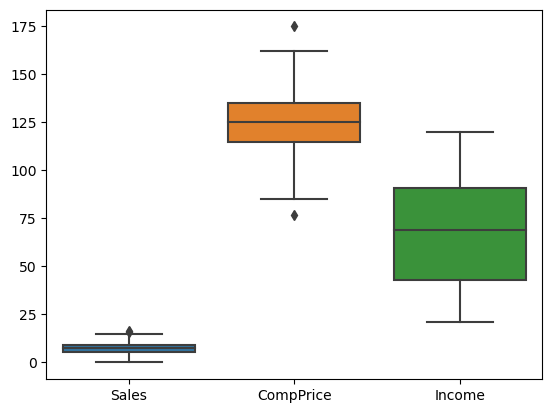

In [10]:
sns.boxplot(data=data.loc[:, ['Sales', 'CompPrice', 'Income']])

<Axes: xlabel='Age', ylabel='Advertising'>

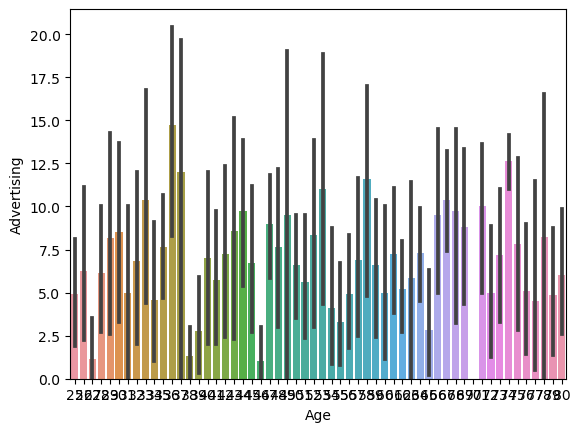

In [11]:
sns.barplot(x="Age",y="Advertising",data=data)

<Axes: xlabel='Sales', ylabel='count'>

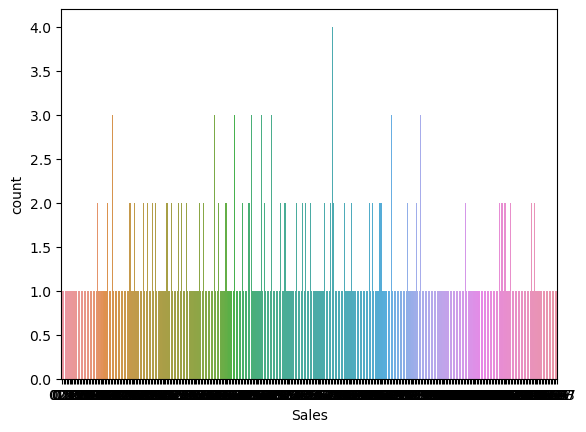

In [12]:
sns.countplot(x="Sales",data=data)

<Axes: xlabel='Sales', ylabel='Price'>

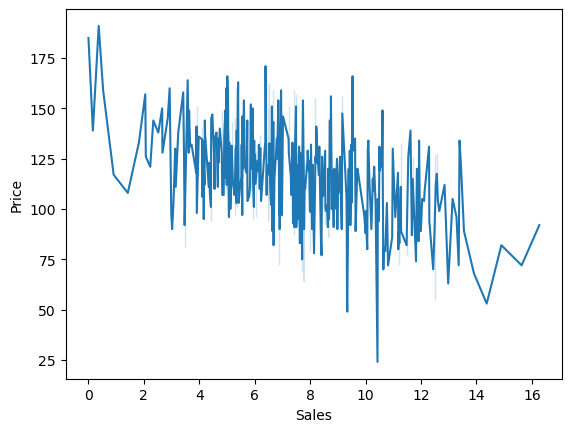

In [14]:
sns.lineplot(x="Sales",y=data["Price"],data=data)

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
label_encoder = preprocessing.LabelEncoder()

In [17]:
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = label_encoder.fit_transform(data["Urban"])
data["US"] = label_encoder.fit_transform(data["US"])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [18]:
data['High'] = data.Sales.map(lambda x: 1 if x>8 else 0)

In [21]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [20]:
cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc',
              'Age','Education','Urban','US']

In [22]:
x = data.drop(['Sales', 'High'], axis = 1)

In [24]:
x = data[cols]
print(x)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [25]:
y = data.High
print(y)

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64


In [26]:
# sampling of data--
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1234)

print(x_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
33         114      38           13         317    128          1   50   
253        124      24            5         288    122          2   57   
118        112      88            2         243     99          2   62   
300        116      78            1         158     99          2   45   
115        139      35            0          95    129          2   42   
..         ...     ...          ...         ...    ...        ...  ...   
204        155      80            0         237    124          2   37   
53         109      64           13          39    119          2   61   
294        148      76            3         126     99          1   60   
211        117     118           14         445    120          2   32   
303        133      52           16         290     99          2   43   

     Education  Urban  US  
33          16      1   1  
253         12      0   1  
118         11      1   1  

In [27]:
print(y_train)

33     1
253    0
118    0
300    1
115    1
      ..
204    1
53     0
294    1
211    1
303    1
Name: High, Length: 320, dtype: int64


In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =1234)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1234)

In [31]:
classifier.score(x_test, y_test)


0.7

In [32]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  9]
 [15 15]]


In [35]:
accuracy_score(y_test, y_pred)

0.7

In [36]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
classifier.score(x_test, y_test)

0.875